In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/Kate/Downloads/Product_Analysis_data2.csv')

In [2]:
# Convert time columns to datetime type 
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'])
df['first_purchase_time'] = pd.to_datetime(df['first_purchase_time'])
df['cohort_week'] = pd.to_datetime(df['cohort_week'])
df['cohort_month'] = df['cohort_week'].dt.to_period('M')

In [3]:
# Turn string values into floats 
df = df.drop(['product_id'], axis=1)
df['purchase'] = 2.49

In [4]:
rev_per_cohort = df.groupby('cohort_week')['purchase'].sum().reset_index()
rev_per_cohort.rename(columns={'purchase': 'rev_per_cohort'}, inplace=True)
rev_per_cohort.head()

,cohort_week,rev_per_cohort
0,2023-02-26,408.36
1,2023-03-05,1591.11
2,2023-03-12,1217.61
3,2023-03-19,1411.83
4,2023-03-26,933.75


In [5]:
users_per_cohort = df.groupby('cohort_week')['user_id'].nunique().reset_index()
users_per_cohort.rename(columns={'user_id': 'users_per_cohort'}, inplace=True)
users_per_cohort.head()

,cohort_week,users_per_cohort
0,2023-02-26,20
1,2023-03-05,88
2,2023-03-12,69
3,2023-03-19,84
4,2023-03-26,50


In [30]:
df = pd.merge(df, rev_per_cohort, on='cohort_week') 
df = pd.merge(df, users_per_cohort, on='cohort_week') 
df.head()

,user_id,event_timestamp,first_purchase_time,cohort_week,lifetime_weeks,purchase,rev_per_cohort_x,users_per_cohort_x,simple_ltv,advanced_ltv,cohort_month,rev_per_cohort_y,users_per_cohort_y
0,6f8592c0-fb4c-47dc-9344-424eb5d88a4b,2023-10-13 09:54:02,2023-10-13 09:54:02,2023-10-08,0,2.49,2.49,1,2.4900,0.327494,2023-10,2.49,1
1,95287b91-85af-4174-9986-aeafb3853bb6,2023-10-14 04:45:14,2023-03-25 04:44:40,2023-03-19,29,2.49,1411.83,84,16.8075,185.689222,2023-03,1411.83,84
2,95287b91-85af-4174-9986-aeafb3853bb6,2023-03-25 04:44:40,2023-03-25 04:44:40,2023-03-19,0,2.49,1411.83,84,16.8075,185.689222,2023-03,1411.83,84
3,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-01 04:44:16,2023-03-25 04:44:40,2023-03-19,1,2.49,1411.83,84,16.8075,185.689222,2023-03,1411.83,84
4,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-08 04:45:55,2023-03-25 04:44:40,2023-03-19,2,2.49,1411.83,84,16.8075,185.689222,2023-03,1411.83,84


In [28]:
# Simple LTV: ARPU (Cумарний прирбуток за період) / CQ (Кіл-ть клієнтів за період) 
df['simple_ltv'] = df['rev_per_cohort'] / df['users_per_cohort']
df.head()   

,user_id,event_timestamp,first_purchase_time,cohort_week,lifetime_weeks,purchase,rev_per_cohort,users_per_cohort,simple_ltv,advanced_ltv,cohort_month
0,6f8592c0-fb4c-47dc-9344-424eb5d88a4b,2023-10-13 09:54:02,2023-10-13 09:54:02,2023-10-08,0,2.49,2.49,1,2.4900,0.327494,2023-10
1,95287b91-85af-4174-9986-aeafb3853bb6,2023-10-14 04:45:14,2023-03-25 04:44:40,2023-03-19,29,2.49,1411.83,84,16.8075,185.689222,2023-03
2,95287b91-85af-4174-9986-aeafb3853bb6,2023-03-25 04:44:40,2023-03-25 04:44:40,2023-03-19,0,2.49,1411.83,84,16.8075,185.689222,2023-03
3,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-01 04:44:16,2023-03-25 04:44:40,2023-03-19,1,2.49,1411.83,84,16.8075,185.689222,2023-03
4,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-08 04:45:55,2023-03-25 04:44:40,2023-03-19,2,2.49,1411.83,84,16.8075,185.689222,2023-03


In [29]:
# Simple LTV2: CLV / ACL 
df['advanced_ltv'] = df['rev_per_cohort'] / df['lifetime_weeks'].mean()
df.head()

,user_id,event_timestamp,first_purchase_time,cohort_week,lifetime_weeks,purchase,rev_per_cohort,users_per_cohort,simple_ltv,advanced_ltv,cohort_month
0,6f8592c0-fb4c-47dc-9344-424eb5d88a4b,2023-10-13 09:54:02,2023-10-13 09:54:02,2023-10-08,0,2.49,2.49,1,2.4900,0.327494,2023-10
1,95287b91-85af-4174-9986-aeafb3853bb6,2023-10-14 04:45:14,2023-03-25 04:44:40,2023-03-19,29,2.49,1411.83,84,16.8075,185.689222,2023-03
2,95287b91-85af-4174-9986-aeafb3853bb6,2023-03-25 04:44:40,2023-03-25 04:44:40,2023-03-19,0,2.49,1411.83,84,16.8075,185.689222,2023-03
3,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-01 04:44:16,2023-03-25 04:44:40,2023-03-19,1,2.49,1411.83,84,16.8075,185.689222,2023-03
4,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-08 04:45:55,2023-03-25 04:44:40,2023-03-19,2,2.49,1411.83,84,16.8075,185.689222,2023-03


In [9]:
#diff = df['advanced_ltv'] - df['simple_ltv']

In [10]:
simplpe_ltv_mean = df['simple_ltv'].mean()
print("Simple LTV mean:", simplpe_ltv_mean)

Simple LTV mean: 16.793061271497844


In [11]:
advanced_ltv_mean = df['advanced_ltv'].mean()
print("Advanced LTV mean:", advanced_ltv_mean)

Advanced LTV mean: 134.06943919780434


 ## Retension rate using matrix

In [12]:
# Group users by cohort and lifetime week
cohorts = df.groupby(['cohort_month', 'lifetime_weeks']).agg({'user_id': 'nunique'})
cohorts.rename(columns={'user_id': 'users_per_cohort'}, inplace=True)
cohorts

users_per_cohort
cohort_month lifetime_weeks                  
2023-02      0                             20
             1                             12
             2                             10
             3                             10
             4                              8
...                                       ...
2023-09      1                              4
             2                              4
             3                              3
             4                              2
2023-10      0                              1

[167 rows x 1 columns]

In [13]:
# Pivot the cohorts DataFrame to create a cohort matrix
cohort_matrix = cohorts.pivot_table(index='cohort_month', columns='lifetime_weeks', values='users_per_cohort')
cohort_matrix

lifetime_weeks,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
cohort_month,,,,,,,,,,,,,,,,,,,,,
2023-02,20.0,12.0,10.0,10.0,8.0,7.0,4.0,7.0,6.0,4.0,...,3.0,3.0,3.0,3.0,2.0,1.0,2.0,2.0,1.0,2.0
2023-03,291.0,174.0,138.0,122.0,105.0,88.0,84.0,81.0,71.0,62.0,...,33.0,29.0,25.0,23.0,23.0,23.0,14.0,9.0,6.0,2.0
2023-04,270.0,151.0,119.0,93.0,84.0,89.0,76.0,71.0,68.0,64.0,...,18.0,18.0,11.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN
2023-05,234.0,133.0,103.0,92.0,90.0,73.0,69.0,63.0,63.0,58.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06,72.0,49.0,42.0,35.0,32.0,32.0,28.0,26.0,24.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07,21.0,11.0,9.0,6.0,7.0,7.0,6.0,4.0,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08,15.0,8.0,7.0,5.0,6.0,2.0,2.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09,10.0,4.0,4.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Select the first column as the initial cohort size
cohort_size = cohort_matrix.iloc[:, 0]

In [15]:
# Calculate retention rate
retention_rate = cohort_matrix.divide(cohort_size, axis=0)
retention_rate #.to_csv (r'C:/Users/Kate/Downloads/Retention_matrixx.csv', header=True)

lifetime_weeks,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
cohort_month,,,,,,,,,,,,,,,,,,,,,
2023-02,1.0,0.600000,0.500000,0.500000,0.400000,0.350000,0.200000,0.350000,0.300000,0.200000,...,0.150000,0.150000,0.150000,0.150000,0.100000,0.050000,0.10000,0.100000,0.050000,0.100000
2023-03,1.0,0.597938,0.474227,0.419244,0.360825,0.302405,0.288660,0.278351,0.243986,0.213058,...,0.113402,0.099656,0.085911,0.079038,0.079038,0.079038,0.04811,0.030928,0.020619,0.006873
2023-04,1.0,0.559259,0.440741,0.344444,0.311111,0.329630,0.281481,0.262963,0.251852,0.237037,...,0.066667,0.066667,0.040741,0.033333,0.011111,NaN,NaN,NaN,NaN,NaN
2023-05,1.0,0.568376,0.440171,0.393162,0.384615,0.311966,0.294872,0.269231,0.269231,0.247863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06,1.0,0.680556,0.583333,0.486111,0.444444,0.444444,0.388889,0.361111,0.333333,0.305556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07,1.0,0.523810,0.428571,0.285714,0.333333,0.333333,0.285714,0.190476,0.142857,0.190476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08,1.0,0.533333,0.466667,0.333333,0.400000,0.133333,0.133333,0.066667,0.066667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09,1.0,0.400000,0.400000,0.300000,0.200000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Calculate churn rate
churn_rate = 1 - retention_rate

In [17]:
# Convert the matrix back to DataFrame with counted retention and churn rate columns
retention_df = retention_rate.reset_index()
retention_df['cohort_month'] = retention_df['cohort_month']
retention_df = retention_df.melt(id_vars=['cohort_month'], value_vars=retention_df.columns[1:], var_name='lifetime_weeks', value_name='retention_rate')
retention_df['churn_rate'] = 1 - retention_df['retention_rate']
retention_df

,cohort_month,lifetime_weeks,retention_rate,churn_rate
0,2023-02,0,1.0,0.0
1,2023-03,0,1.0,0.0
2,2023-04,0,1.0,0.0
3,2023-05,0,1.0,0.0
4,2023-06,0,1.0,0.0
...,...,...,...,...
292,2023-06,32,NaN,NaN
293,2023-07,32,NaN,NaN
294,2023-08,32,NaN,NaN
295,2023-09,32,NaN,NaN


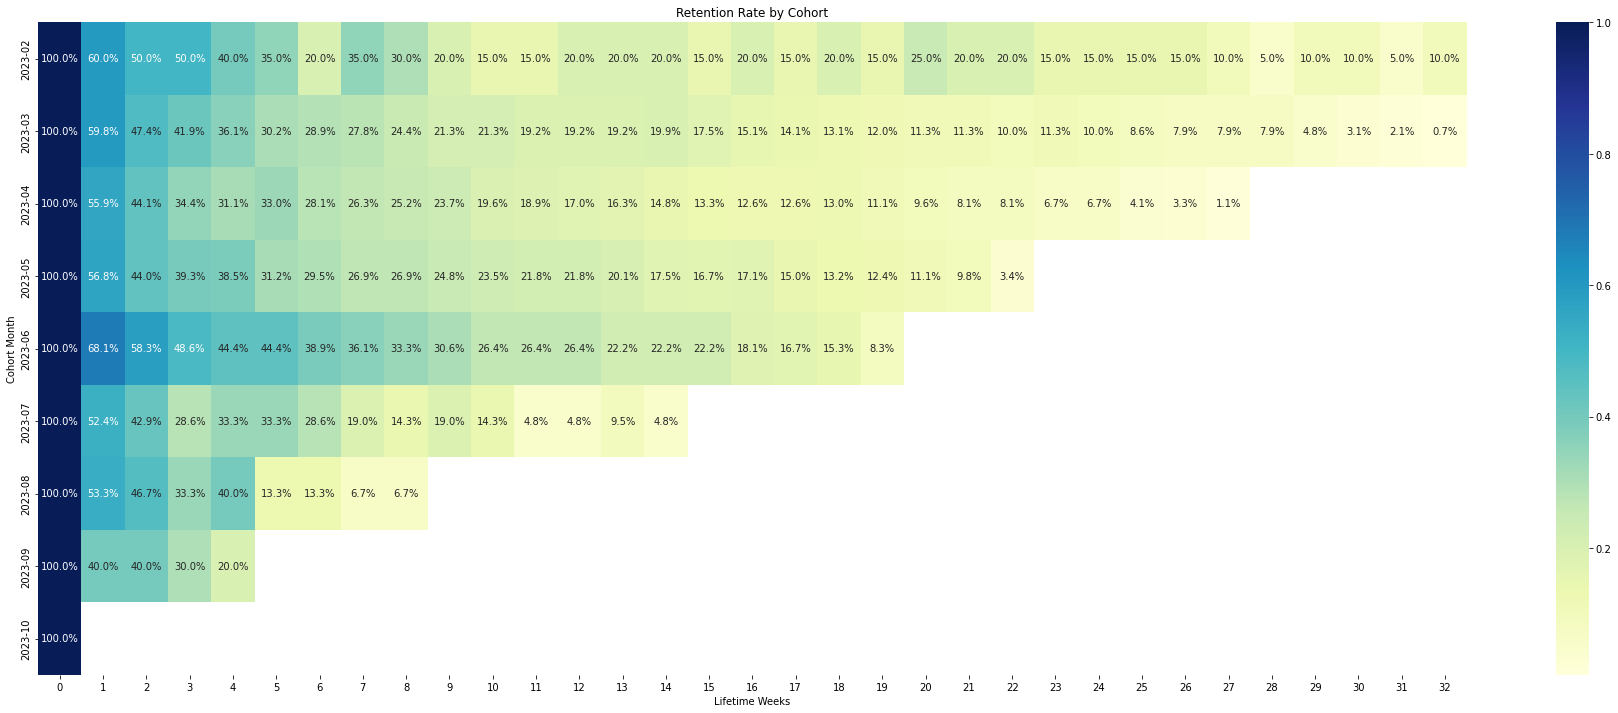

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(32, 12))
sns.heatmap(retention_rate, annot=True, fmt=".1%", cmap='YlGnBu') #fmt=".1%" , fmt=".0%", fmt="d"
plt.title('Retention Rate by Cohort')
plt.xlabel('Lifetime Weeks')
plt.ylabel('Cohort Month')
plt.show()

In [20]:
# Group by month and sum purchase column 
retention_df['month_revenue'] = df.groupby('cohort_month')['purchase'].transform('sum') 

In [21]:
# Calculate total number of unique users for each month
retention_df['month_users'] = df.groupby('cohort_month')['user_id'].transform('nunique') 

In [22]:
# Calculate monthly ARPU
retention_df['month_arpu'] = retention_df['month_revenue'] / retention_df['month_users']

In [23]:
# Calculate LTV using ARPU and monthly churn rate
retention_df['churn_ltv'] = retention_df['month_arpu'] / retention_df['churn_rate']

In [24]:
retention_df

,cohort_month,lifetime_weeks,retention_rate,churn_rate,month_revenue,month_users,month_arpu,churn_ltv
0,2023-02,0,1.0,0.0,2.49,1,2.490000,inf
1,2023-03,0,1.0,0.0,5154.30,291,17.712371,inf
2,2023-04,0,1.0,0.0,5154.30,291,17.712371,inf
3,2023-05,0,1.0,0.0,5154.30,291,17.712371,inf
4,2023-06,0,1.0,0.0,5154.30,291,17.712371,inf
...,...,...,...,...,...,...,...,...
292,2023-06,32,NaN,NaN,5154.30,291,17.712371,NaN
293,2023-07,32,NaN,NaN,5154.30,291,17.712371,NaN
294,2023-08,32,NaN,NaN,5154.30,291,17.712371,NaN
295,2023-09,32,NaN,NaN,5154.30,291,17.712371,NaN


In [25]:
pd.concat([df,retention_df]).drop_duplicates().reset_index(drop=True)
df

,user_id,event_timestamp,first_purchase_time,cohort_week,lifetime_weeks,purchase,rev_per_cohort,users_per_cohort,simple_ltv,advanced_ltv,cohort_month
0,6f8592c0-fb4c-47dc-9344-424eb5d88a4b,2023-10-13 09:54:02,2023-10-13 09:54:02,2023-10-08,0,2.49,2.49,1,2.4900,0.327494,2023-10
1,95287b91-85af-4174-9986-aeafb3853bb6,2023-10-14 04:45:14,2023-03-25 04:44:40,2023-03-19,29,2.49,1411.83,84,16.8075,185.689222,2023-03
2,95287b91-85af-4174-9986-aeafb3853bb6,2023-03-25 04:44:40,2023-03-25 04:44:40,2023-03-19,0,2.49,1411.83,84,16.8075,185.689222,2023-03
3,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-01 04:44:16,2023-03-25 04:44:40,2023-03-19,1,2.49,1411.83,84,16.8075,185.689222,2023-03
4,95287b91-85af-4174-9986-aeafb3853bb6,2023-04-08 04:45:55,2023-03-25 04:44:40,2023-03-19,2,2.49,1411.83,84,16.8075,185.689222,2023-03
...,...,...,...,...,...,...,...,...,...,...,...
6081,20ad8e32-dda9-49b6-b600-4ea361277f41,2023-10-12 03:54:22,2023-06-21 12:07:00,2023-06-18,16,2.49,134.46,12,11.2050,17.684688,2023-06
6082,23e476af-639f-4312-8eb4-e86ec50c3020,2023-06-25 12:09:41,2023-06-25 12:09:41,2023-06-18,0,2.49,134.46,12,11.2050,17.684688,2023-06
6083,23e476af-639f-4312-8eb4-e86ec50c3020,2023-07-02 12:09:51,2023-06-25 12:09:41,2023-06-18,1,2.49,134.46,12,11.2050,17.684688,2023-06
6084,23e476af-639f-4312-8eb4-e86ec50c3020,2023-07-09 12:10:53,2023-06-25 12:09:41,2023-06-18,2,2.49,134.46,12,11.2050,17.684688,2023-06


In [26]:
#df.to_csv (r'C:/Users/Kate/Downloads/LTV_dataframe.csv', index = None, header=True)

In [27]:
#retention_rate.to_csv (r'C:/Users/Kate/Downloads/Retention_matrix.csv', index = None, header=True)